# CO2 Emission by Vehicles

## <font color='red'> Business Objective </font>
- ##### The fundamental goal here is to model the CO2 emissions as a function of several car engines features.

## <font color='red'> Data Set Details </font>
 
#### The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. In that way, this problem has the 12 following variables:
- ##### make, car brand under study. 
- ##### model, the specific model of the car. 
- ##### vehicle_class, car body type of the car. 
- ##### engine_size, size of the car engine, in Litres. 
- ##### cylinders, number of cylinders. 
- ##### transmission, "A" for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable', "M" for 'Manual'. 
- ##### fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'. 
- ##### fuel_consumption_city, City fuel consumption ratings, in litres per 100 kilometres. 
- ##### fuel_consumption_hwy, Highway fuel consumption ratings, in litres per 100 kilometres. 
- ##### fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km. 
- ##### fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg). 
- ##### co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer. 


### <font color='green'> Importing some important libraries </font>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## <font color='green'> EDA (Exploratory Data Analysis)</font>

In [106]:
# storing the data into a variable
df = pd.read_csv('co2_emissions.csv')

In [107]:
#check first 10 records
df.head(10)

make       model vehicle_class  engine_size  cylinders transmission  \
0  ACURA         ILX       COMPACT          2.0          4           AS   
1  ACURA         ILX       COMPACT          2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT          1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6           AS   
5  ACURA         RLX      MID-SIZE          3.5          6           AS   
6  ACURA          TL      MID-SIZE          3.5          6           AS   
7  ACURA      TL AWD      MID-SIZE          3.7          6           AS   
8  ACURA      TL AWD      MID-SIZE          3.7          6            M   
9  ACURA         TSX       COMPACT          2.4          4           AS   

  fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   
3         Z                   12.7                   9.1   
4         Z                   12.1                   8.7   
5         Z                   11.9                   7.7   
6         Z                   11.8                   8.1   
7         Z                   12.8                   9.0   
8         Z                   13.4                   9.5   
9         Z                   10.6                   7.5   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244  
5                            10.0                          28            230  
6                            10.1                          28            232  
7                            11.1                          25            255  
8                            11.6                          24            267  
9                             9.2                          31            212

In [108]:
#check last 10 records
df.tail()

make        model   vehicle_class  engine_size  cylinders transmission  \
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248

In [109]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [5]:
df = df.rename(columns={
    'make':'Make',
    'model':'Model',
    'vehicle_class':'Vehicle Class',
    'engine_size': 'Engine Size(L)',
    'cylinders':'Cylinders',
    'transmission':'Transmission',
    'fuel_type':'Fuel Type', 
    'fuel_consumption_city':'Fuel Consumption City (L/100 km)',
    'fuel_consumption_hwy':'Fuel Consumption Hwy (L/100 km)',
    'fuel_consumption_comb(l/100km)':'Fuel_Consumption_Comb',
    'fuel_consumption_comb(mpg)': 'Fuel Consumption Comb (mpg)',
    'co2_emissions(g/km)':'CO2 Emissions(g/km)'    
})

In [6]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  co2_emissions  
0                           33            196  
1                           29            221  
2                           48            136  
3                           25            255  
4                           27            244

In [7]:
#checking the null values
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel_Consumption_Comb               0
Fuel Consumption Comb (mpg)         0
co2_emissions                       0
dtype: int64

##### We can say there is no null values is present in out data set.

In [8]:
# collecting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel_Consumption_Comb             7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  co2_emissions                     7385 non-null   int64  
dtypes: flo

In [9]:
#checking the shape of the data set
df.shape

(7385, 12)

In [10]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel_Consumption_Comb             7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
co2_emissions                     7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel_Consumption_Comb              10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
co2_emissions                     246.0  288.0  522.0

In [11]:
# checking duplicate values
df.duplicated().sum()

1112

In [12]:
# droping all the duplicate values
df.drop_duplicates(inplace=True)

In [13]:
len(df)

6273

In [14]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    6273.0    3.163000   1.365294   0.9    2.0   
Cylinders                         6273.0    5.620596   1.846424   3.0    4.0   
Fuel Consumption City (L/100 km)  6273.0   12.615591   3.550572   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   6273.0    9.073426   2.277893   4.0    7.5   
Fuel_Consumption_Comb             6273.0   11.022111   2.945028   4.1    8.9   
Fuel Consumption Comb (mpg)       6273.0   27.395026   7.225472  11.0   22.0   
co2_emissions                     6273.0  251.247250  59.235396  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.7   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.3   20.6  
Fuel_Consumption_Comb              10.6   12.7   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
co2_emissions                     246.0  289.0  522.0

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4           AS   
1  ACURA         ILX       COMPACT             2.4          4            M   
2  ACURA  ILX HYBRID       COMPACT             1.5          4           AV   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6           AS   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6           AS   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  co2_emissions  
0                           33            196  
1                           29            221  
2                           48            136  
3                           25            255  
4                           27            244

## <font color='red'>Visualization</font>

### <font color='green'> Brands of Cars </font>

In [17]:
print("We have total",len(df['Make'].unique()),"Car Companies Data")
df_brand = df['Make'].value_counts().reset_index().rename(columns={'index':'Index'})
df_brand.head(20)

We have total 42 Car Companies Data


Index  Make
0            FORD   575
1       CHEVROLET   515
2             BMW   501
3   MERCEDES-BENZ   365
4         PORSCHE   296
5             GMC   289
6          TOYOTA   274
7            AUDI   263
8          NISSAN   213
9            MINI   200
10           JEEP   200
11            KIA   192
12     VOLKSWAGEN   187
13        HYUNDAI   184
14          DODGE   180
15          HONDA   159
16       CADILLAC   141
17          LEXUS   129
18          MAZDA   127
19         SUBARU   119

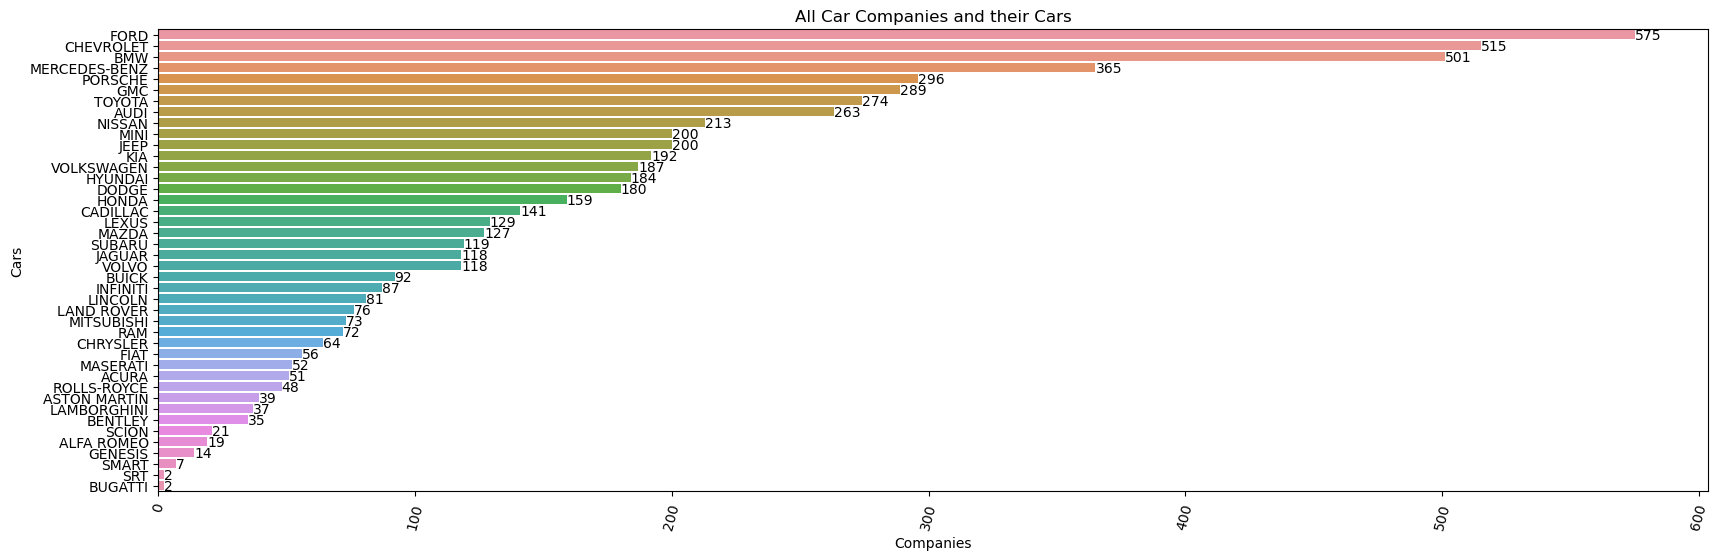

In [18]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data =df_brand,x="Make", y="Index")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

### <font color=green> Models of cars </font>

In [19]:
print("We have total",len(df['Model'].unique()),"Car Models")
df_model = df['Model'].value_counts().reset_index().rename(columns={'index':'Index'})[:25]
df_model.head(20)

We have total 2053 Car Models


Index  Model
0       F-150 FFV     32
1   F-150 FFV 4X4     31
2         MUSTANG     26
3       FOCUS FFV     24
4       F-150 4X4     20
5           F-150     19
6         SONIC 5     18
7             ATS     18
8           JETTA     18
9         COMPASS     18
10         CAMARO     17
11          SONIC     17
12         SIERRA     16
13        COROLLA     16
14         ACCORD     16
15        PATRIOT     16
16      SILVERADO     16
17  SILVERADO 4WD     16
18     TACOMA 4WD     16
19     SIERRA 4WD     16

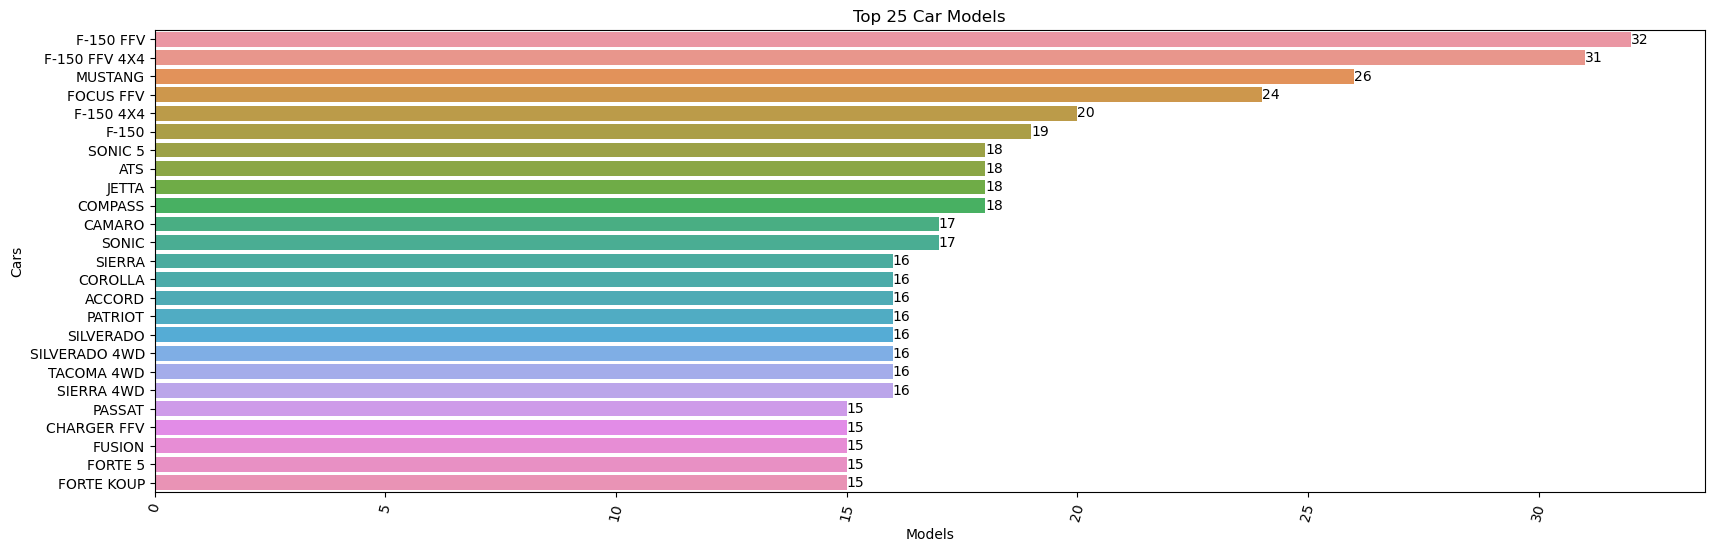

In [20]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "Model",  y= "Index")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

### <font color=green> Vehicle Class </font>

In [21]:
print("We have total",len(df['Vehicle Class'].unique()),"Vehicle Class")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index().rename(columns={'index':'Index'})
df_vehicle_class

We have total 16 Vehicle Class


Index  Vehicle Class
0                SUV - SMALL           1004
1                   MID-SIZE            981
2                    COMPACT            902
3             SUV - STANDARD            613
4                 SUBCOMPACT            532
5                  FULL-SIZE            508
6    PICKUP TRUCK - STANDARD            474
7                 TWO-SEATER            381
8                MINICOMPACT            274
9      STATION WAGON - SMALL            212
10      PICKUP TRUCK - SMALL            133
11           VAN - PASSENGER             66
12   SPECIAL PURPOSE VEHICLE             65
13                   MINIVAN             61
14  STATION WAGON - MID-SIZE             45
15               VAN - CARGO             22

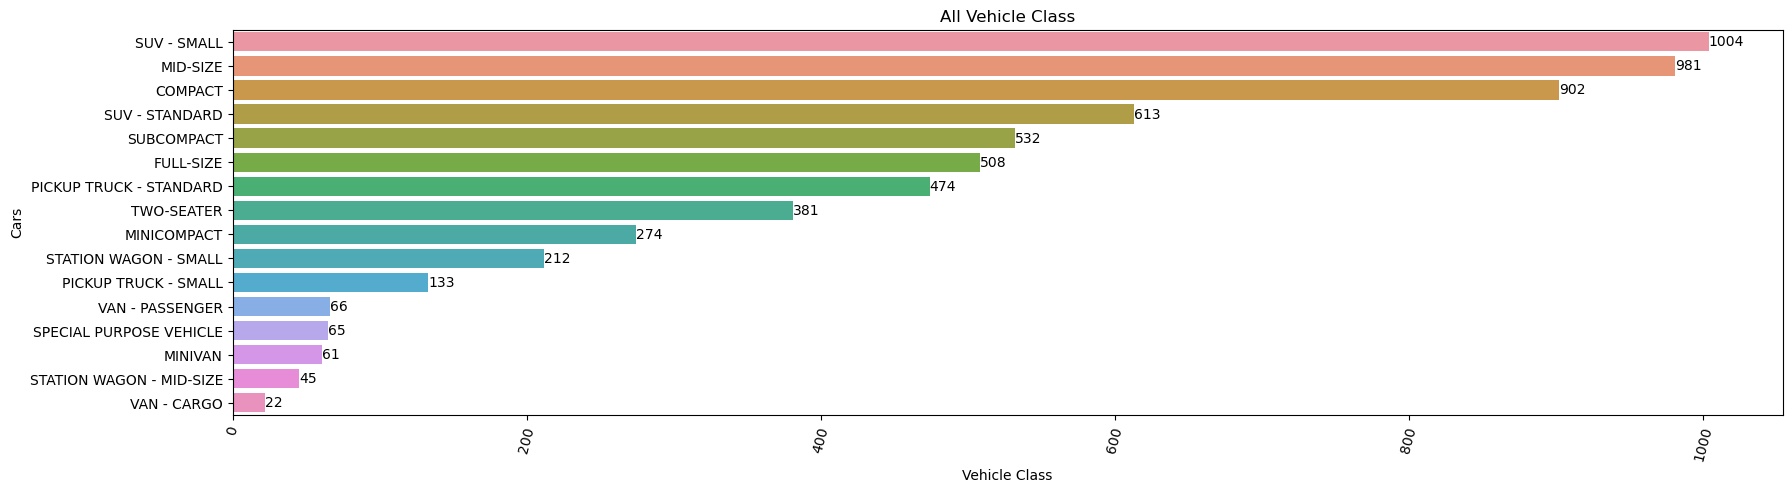

In [22]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "Vehicle Class",  y= "Index")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

### <font color='green'> Engine Sizes of cars</font>

In [23]:
print("We have total",len(df['Engine Size(L)'].unique()),"Types of Engine Size")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index().rename(columns={'index':'Index'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


Index  Engine Size(L)
0     2.0            1260
1     3.0             687
2     3.6             433
3     3.5             431
4     2.5             353
5     2.4             287
6     1.6             272
7     5.3             240
8     1.8             187
9     5.0             178
10    1.5             175
11    1.4             170
12    4.0             161
13    6.2             141
14    4.4             124
15    3.8             100
16    5.7              92
17    3.7              90
18    2.7              86
19    6.0              86

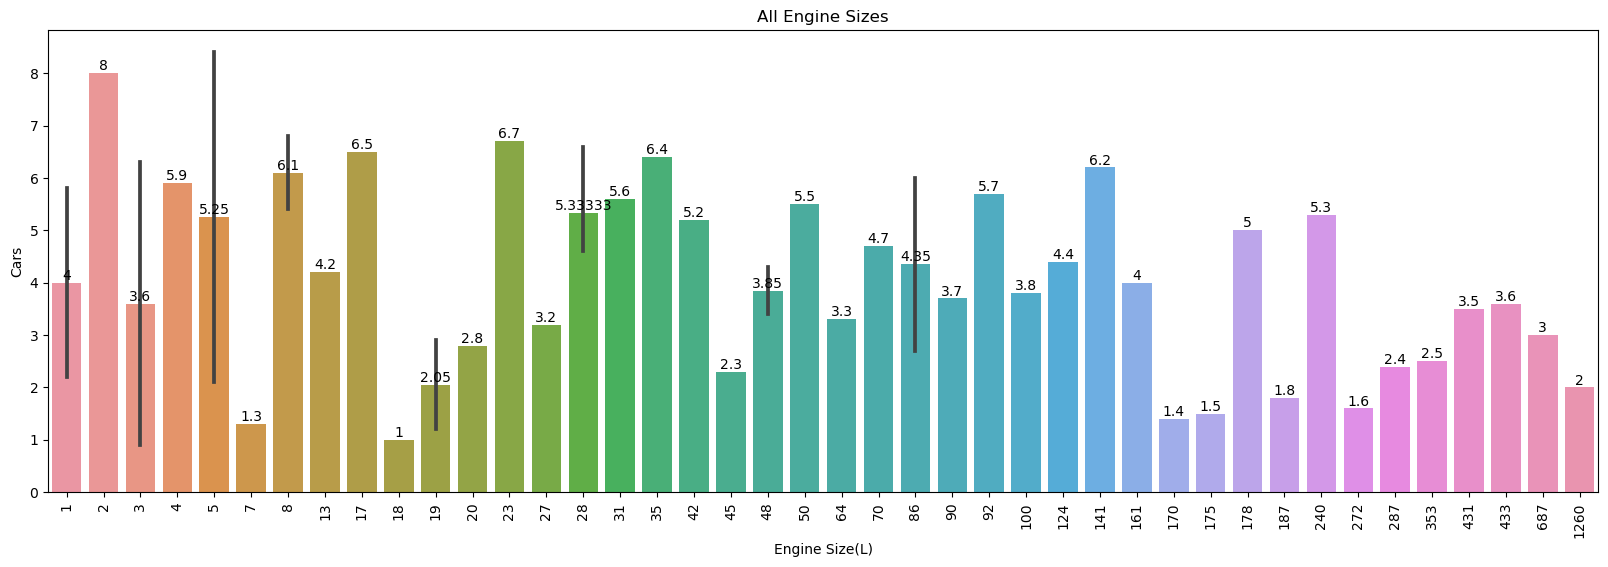

In [24]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "Engine Size(L)",  y= "Index")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

### <font color='green'> Cylinders </font>

In [25]:
print("We have total",len(df['Cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['Cylinders'].value_counts().reset_index().rename(columns={'index':'Index'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


Index  Cylinders
0      4       2741
1      6       2040
2      8       1201
3     12        135
4      3         88
5     10         40
6      5         26
7     16          2

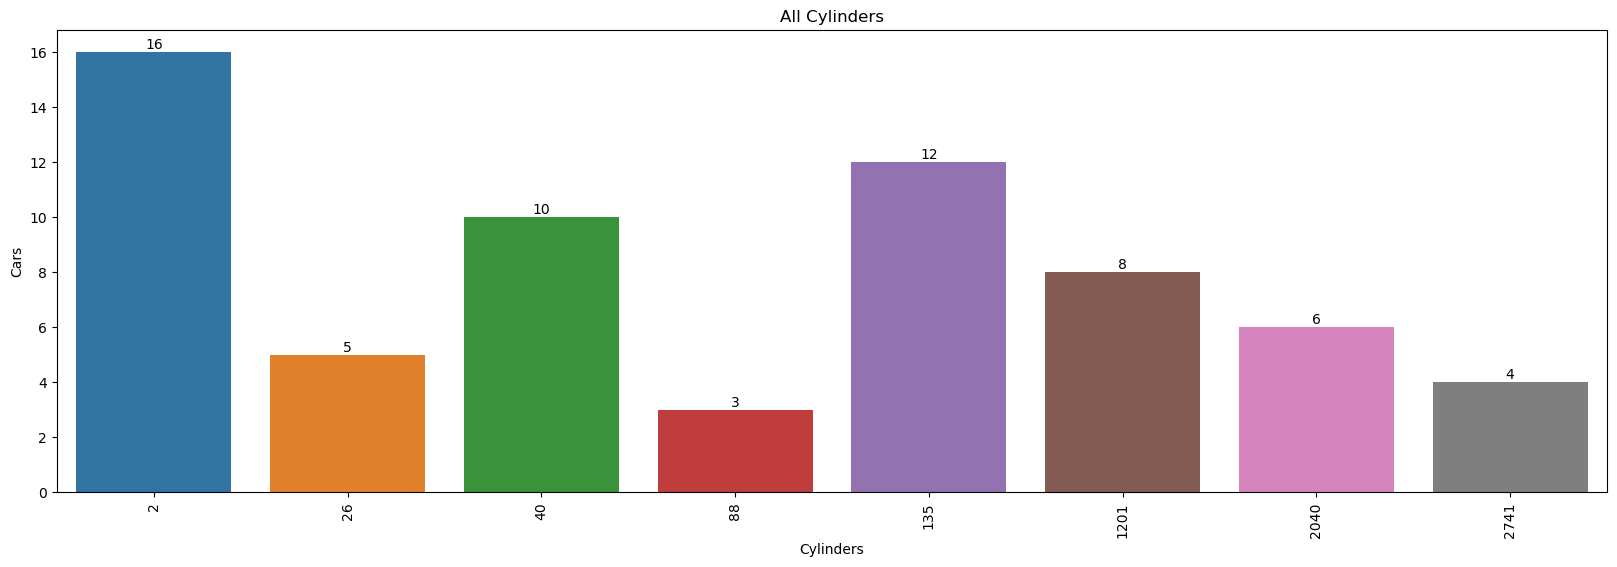

In [26]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "Cylinders",  y= "Index")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

### <font color='green'> Transmission of Cars </font>

In [27]:
df['Transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

#### Here we have to map similar labels into a single label for our Transmission column.

In [28]:
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [29]:
print("We have total",len(df['Transmission'].unique()),"Transmissions")
df_transmission = df['Transmission'].value_counts().reset_index().rename(columns={'index':'Index'})
df_transmission

We have total 5 Transmissions


Index  Transmission
0                     AS          2720
1                      A          1536
2                      M          1019
3                     AM           540
4  Continuously Variable           458

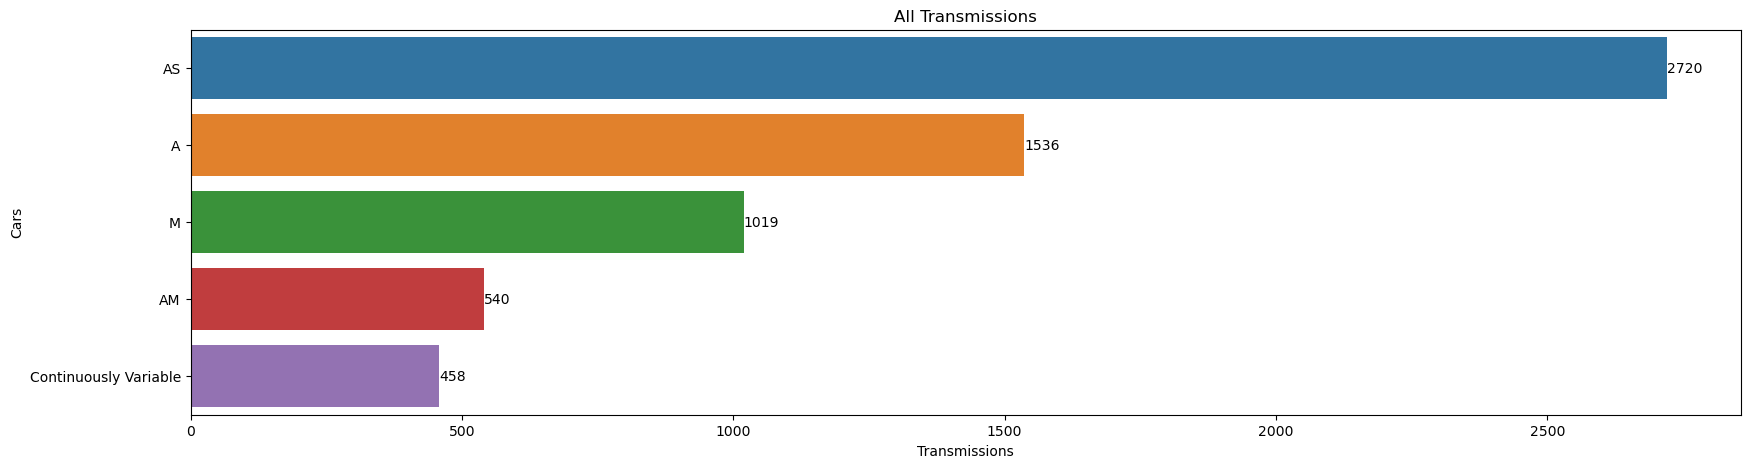

In [30]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "Index")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

### <font color='green'> Fuel Type of Cars </font>

In [31]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

#### Here we have to map similar labels into a single label for our Fuel Type column.

In [32]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [33]:
print("We have total",len(df['Fuel Type'].unique()),"Fuel Types")
df_fuel_type = df['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Index'})
df_fuel_type

We have total 5 Fuel Types


Index  Fuel Type
0  Regular Gasoline       3030
1  Premium Gasoline       2765
2      Ethanol(E85)        330
3            Diesel        147
4       Natural Gas          1

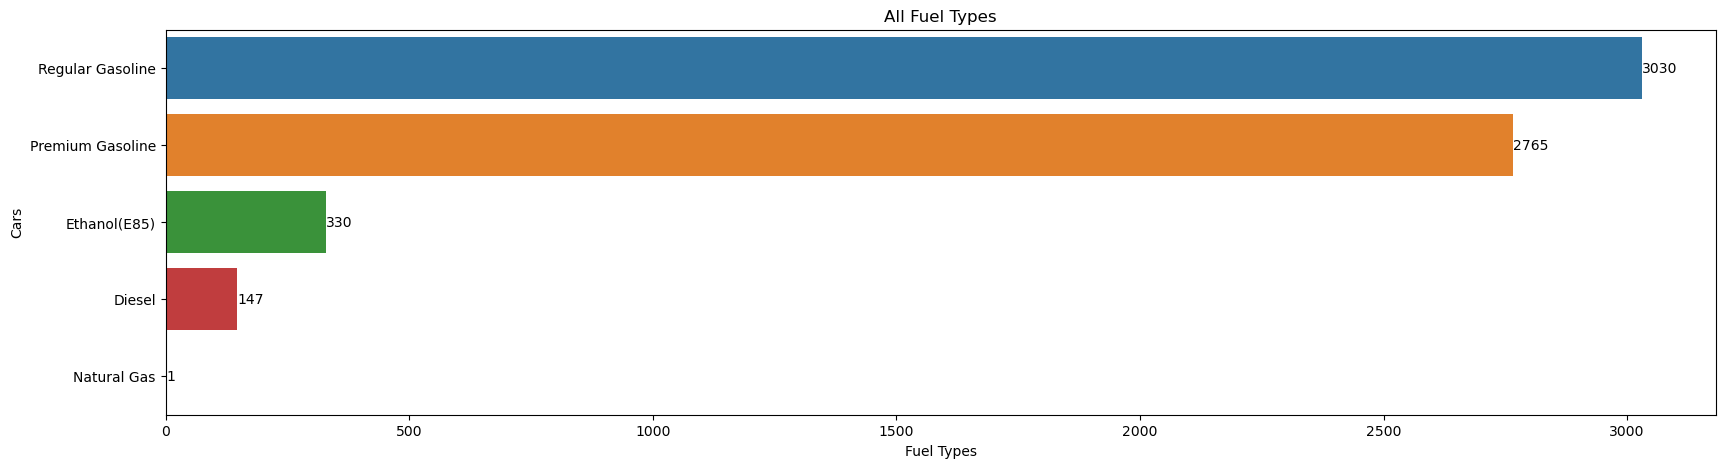

In [34]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "Index")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

### <font color='green'> Distplot </font>

In [35]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel_Consumption_Comb',
       'Fuel Consumption Comb (mpg)', 'co2_emissions'],
      dtype='object')

<Axes: xlabel='co2_emissions', ylabel='Density'>

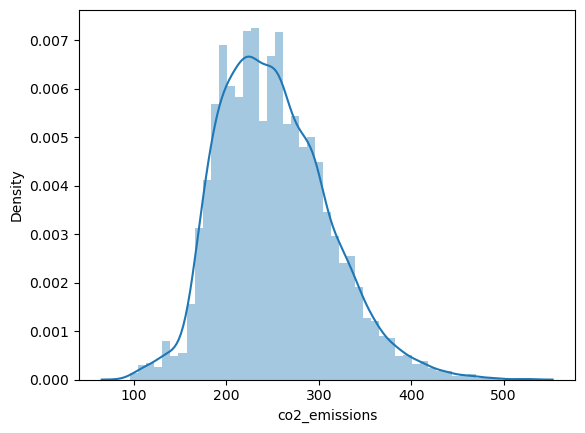

In [36]:
sns.distplot(df['co2_emissions'])

<Axes: xlabel='Cylinders', ylabel='Density'>

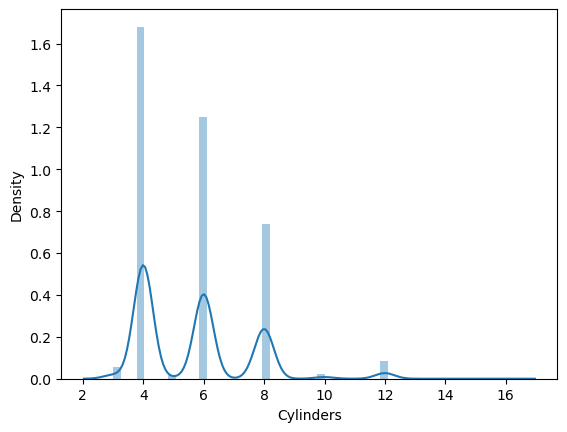

In [37]:
sns.distplot(df['Cylinders'])

<Axes: xlabel='Engine Size(L)', ylabel='Density'>

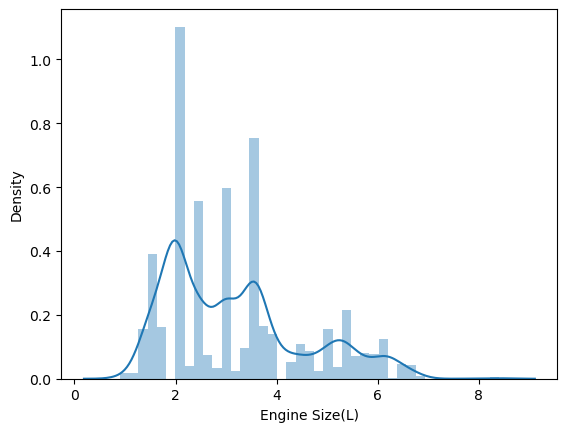

In [38]:
sns.distplot(df['Engine Size(L)'])

<Axes: xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

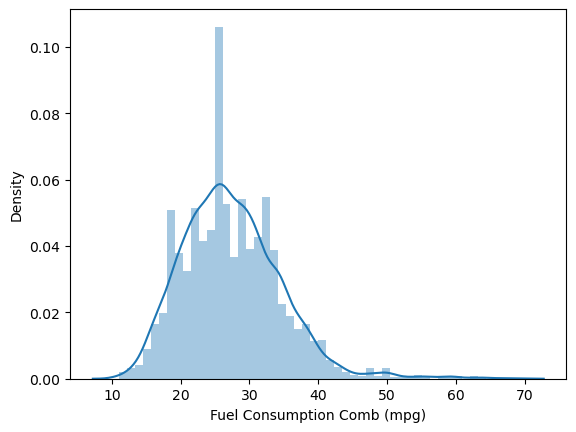

In [39]:
sns.distplot(df['Fuel Consumption Comb (mpg)'])

## <font color='red'>Variation in CO2 emissions with different features.</font>

### <font color='green'> CO2 Emission with Brand </font>

In [40]:
df_co2_make = df.groupby(['Make'])['co2_emissions'].mean().sort_values().reset_index()

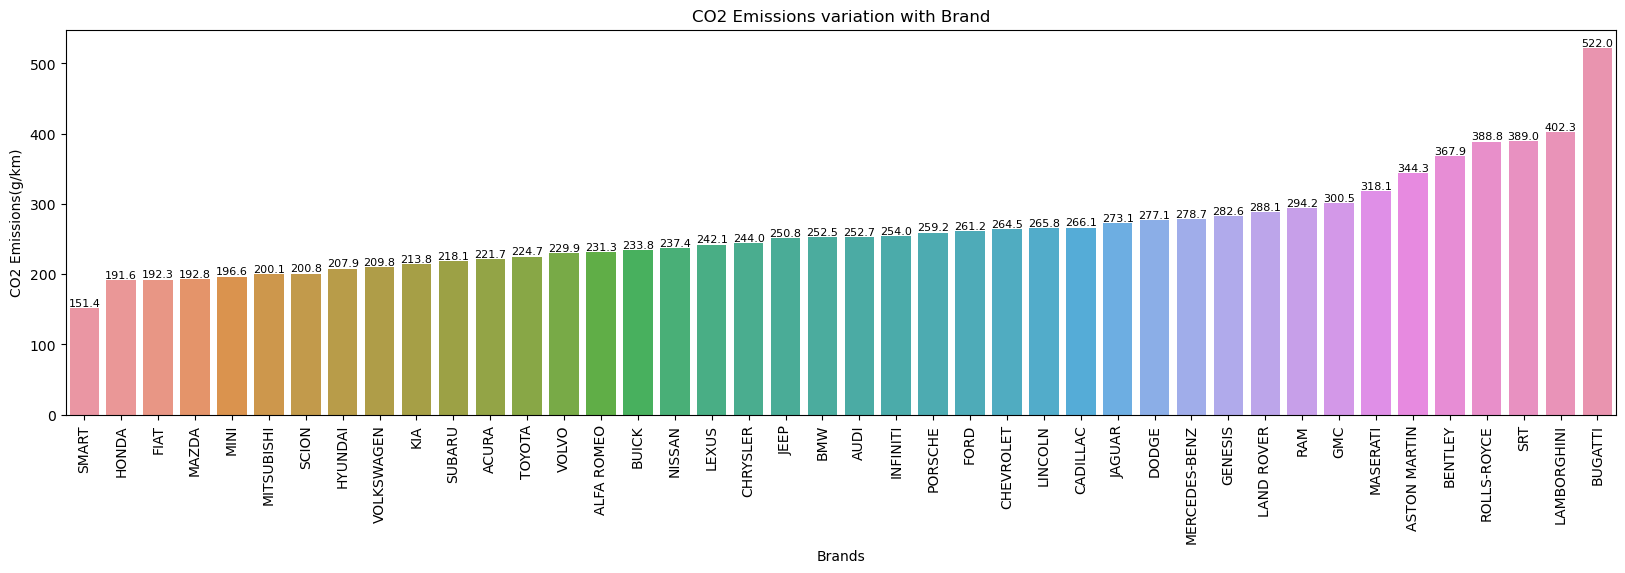

In [41]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

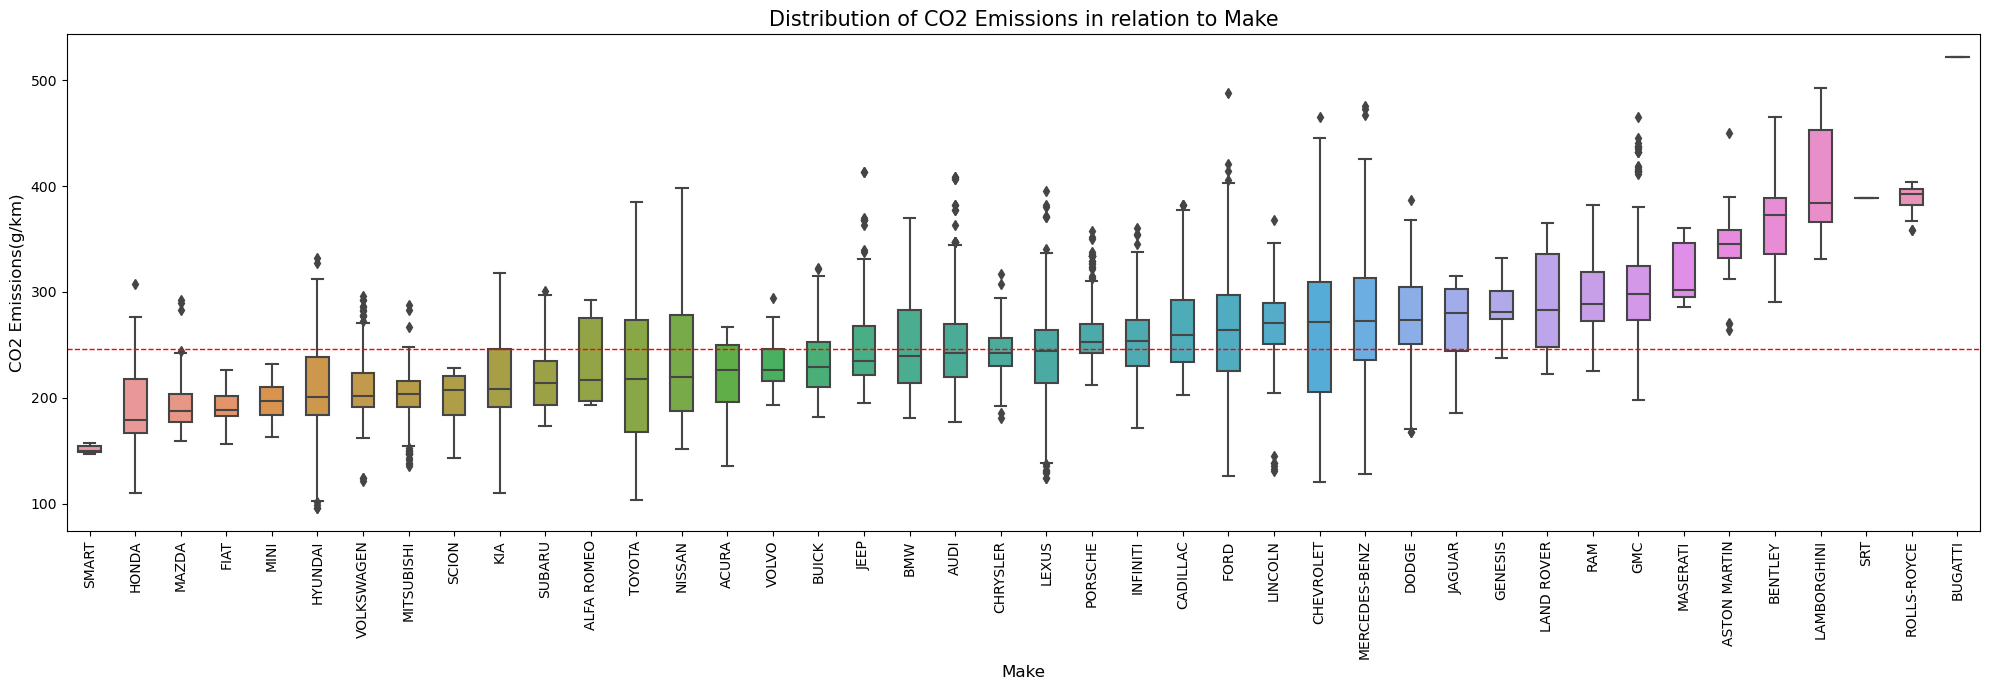

In [42]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Vehicle Class </font>

In [43]:
df_co2_vehicle_class = df.groupby(['Vehicle Class'])['co2_emissions'].mean().sort_values().reset_index()

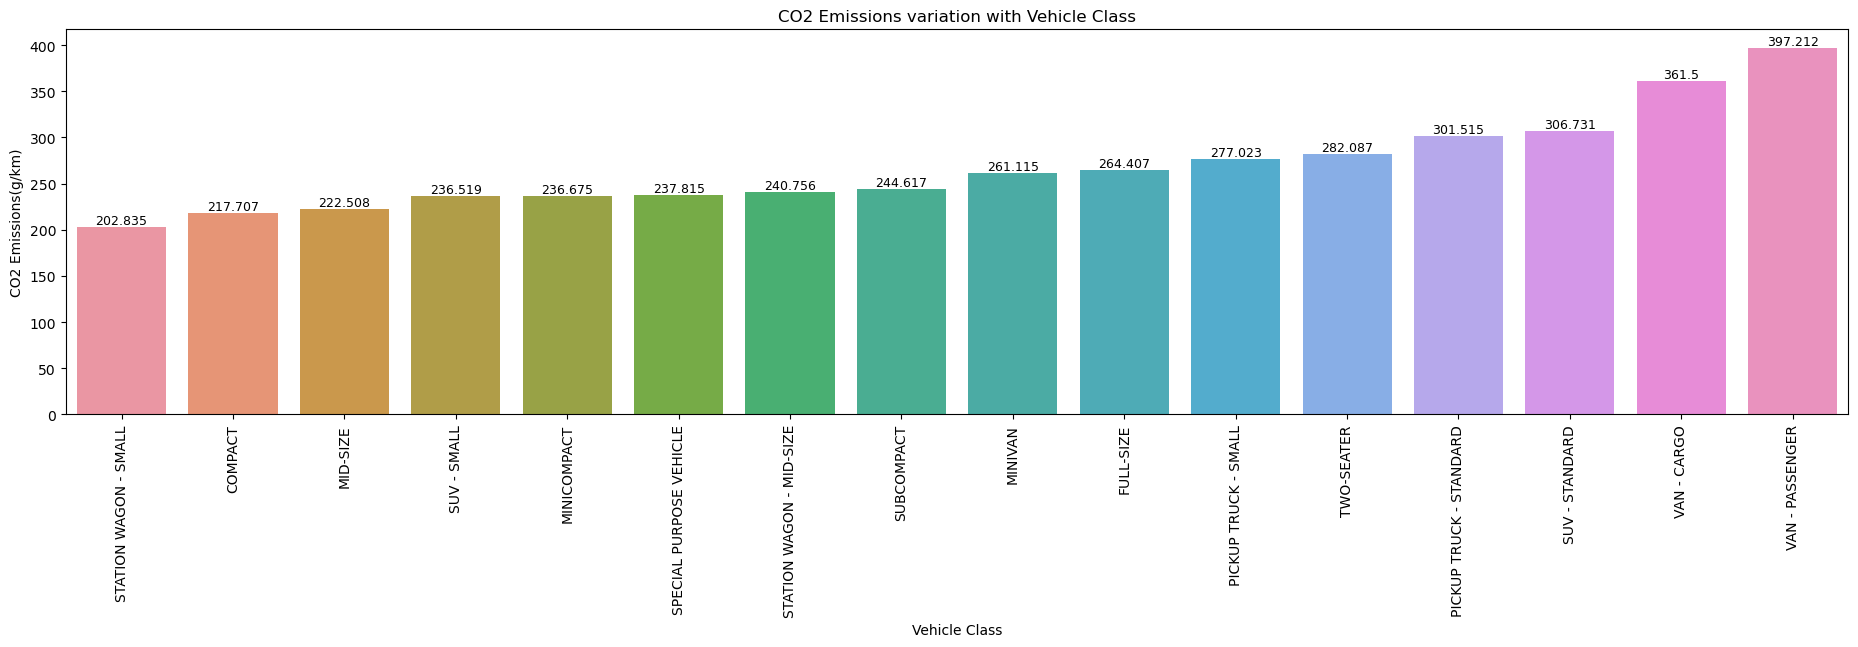

In [44]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "Vehicle Class",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

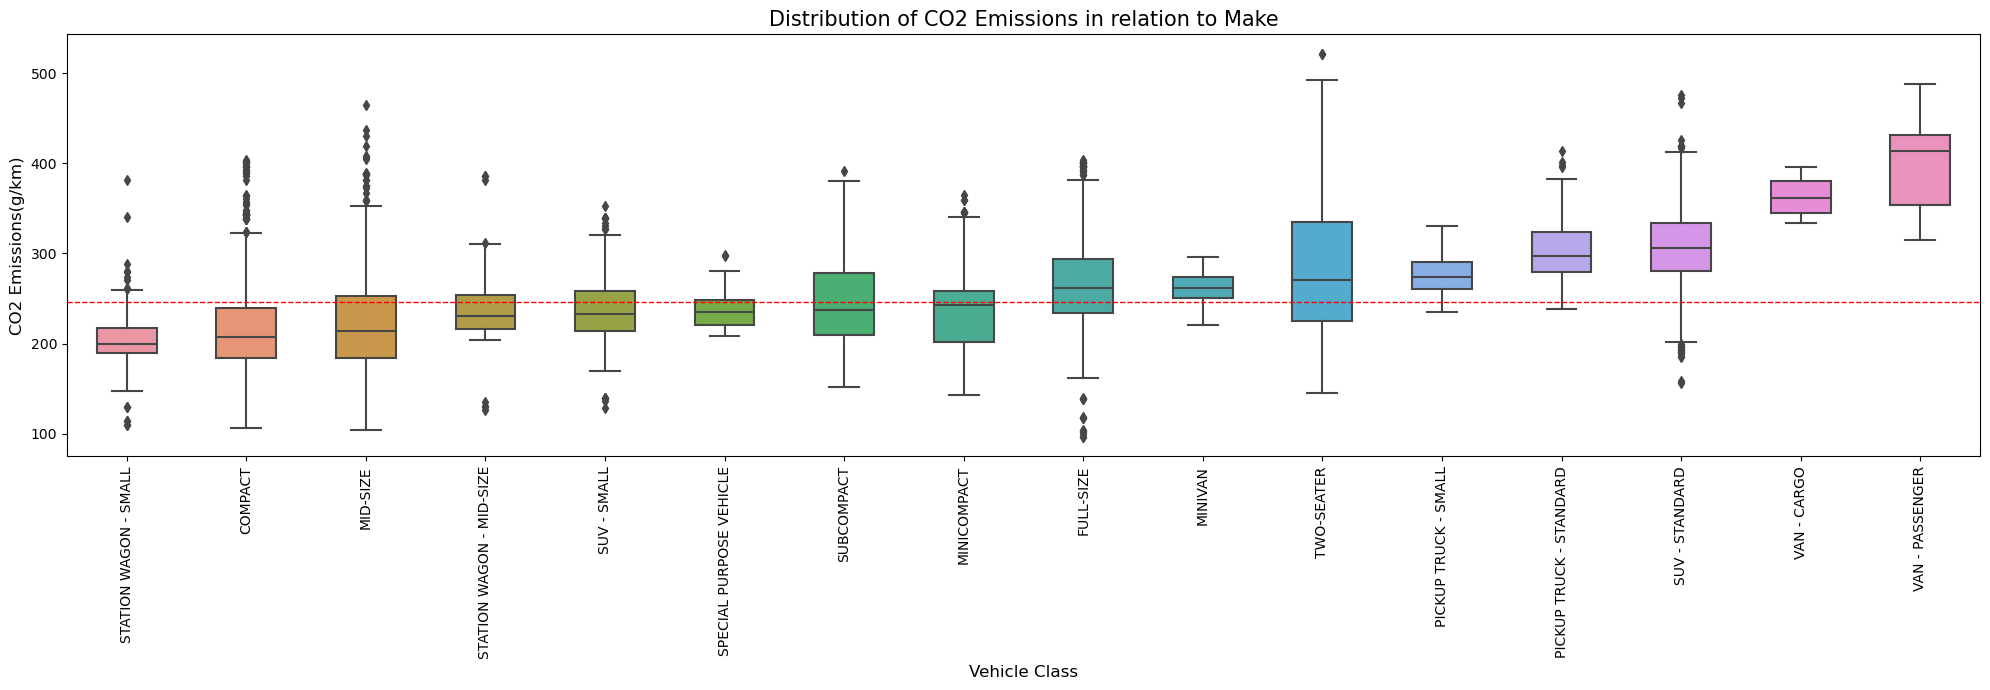

In [45]:
plt.figure(figsize=(20,7))
order = df.groupby("Vehicle Class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Transmission </font>

In [46]:
df_co2_transmission = df.groupby(['Transmission'])['co2_emissions'].mean().sort_values().reset_index()

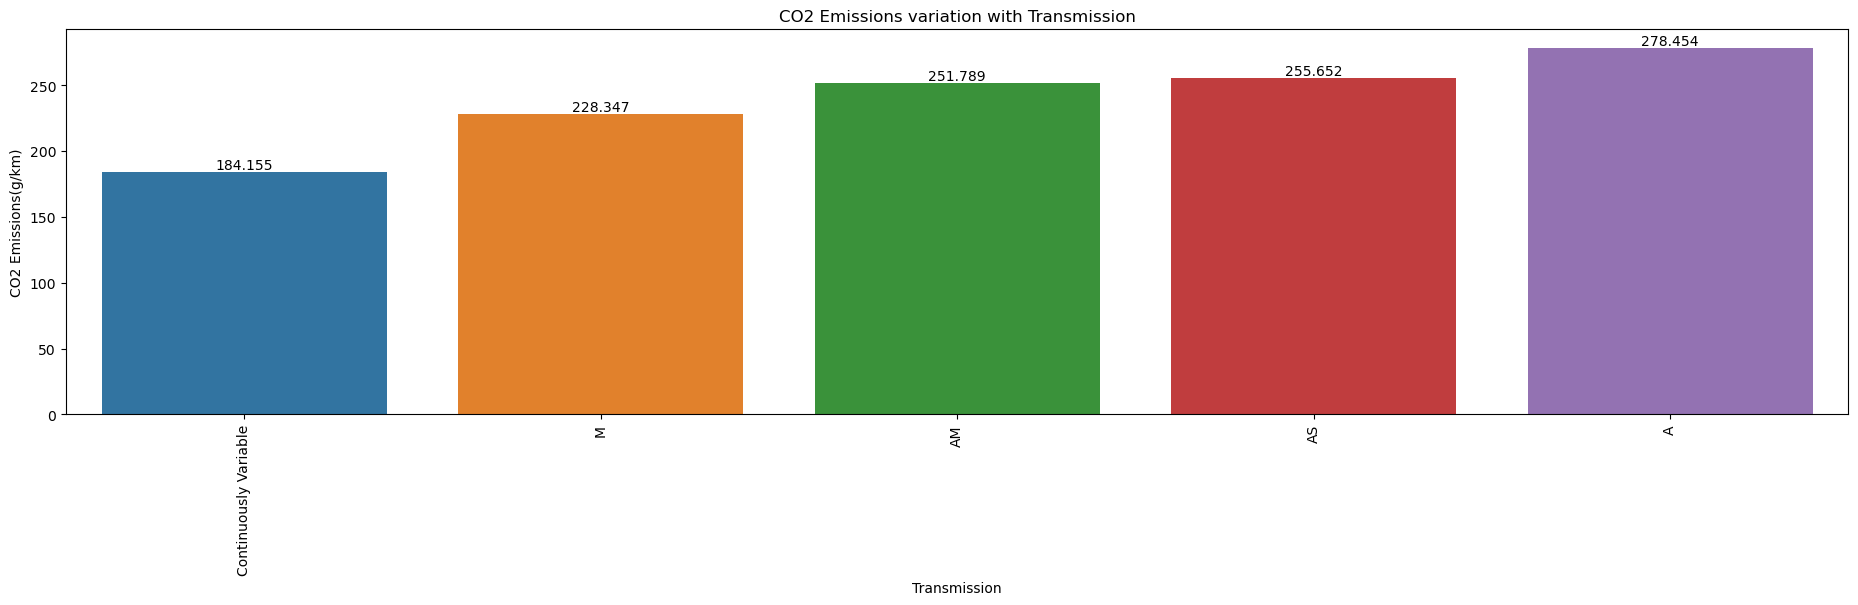

In [47]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "Transmission",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=10)
plt.show()

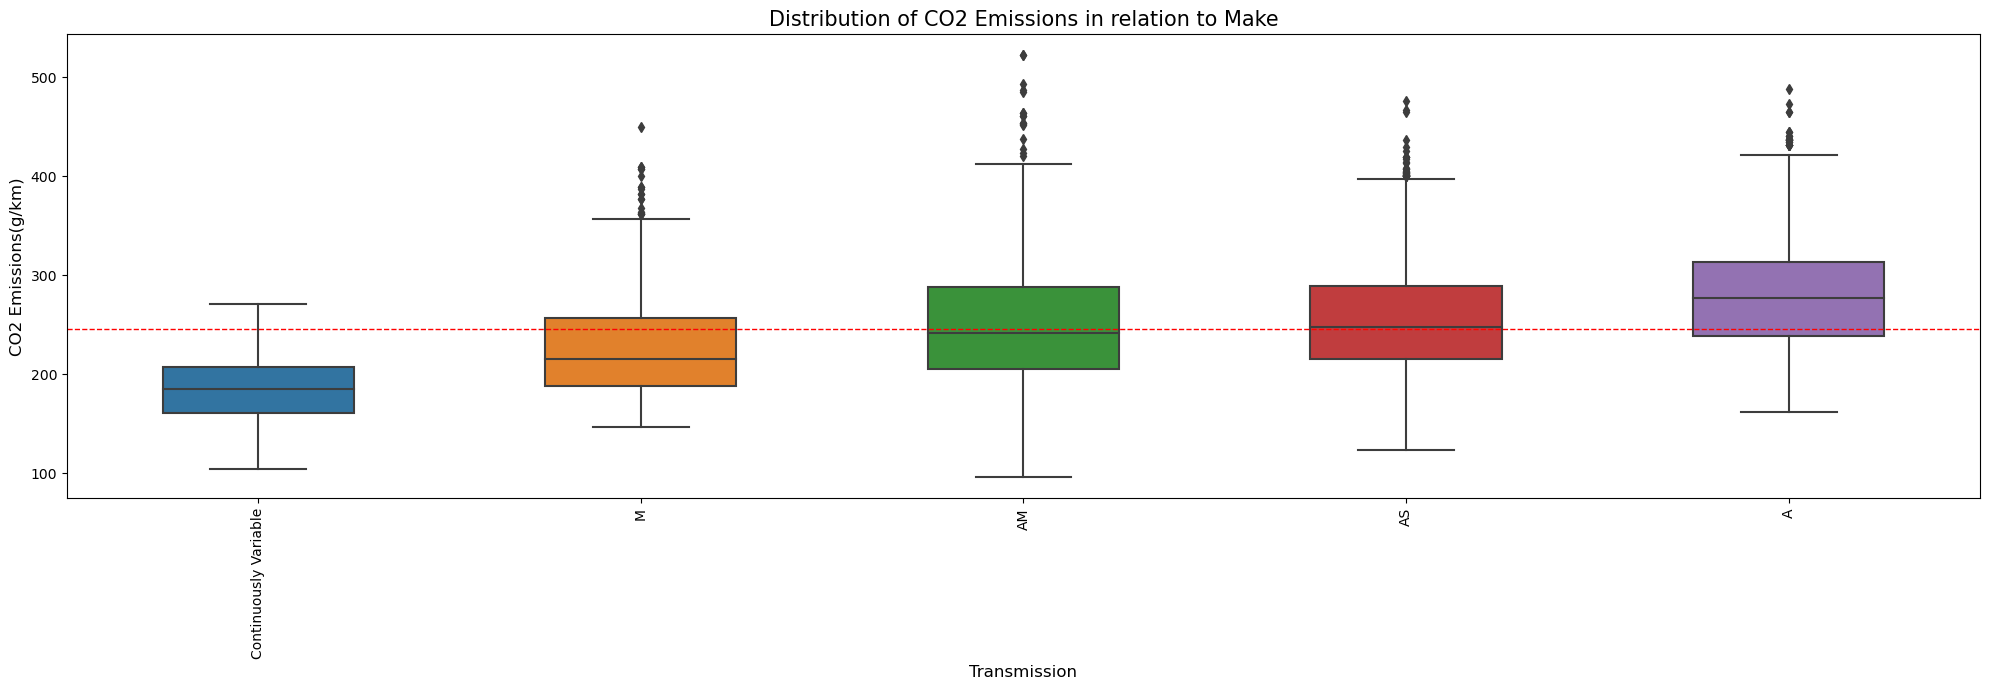

In [48]:
plt.figure(figsize=(20,7))
order = df.groupby("Transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Fuel Type </font>

In [49]:
df_co2_fuel_type = df.groupby(['Fuel Type'])['co2_emissions'].mean().sort_values().reset_index()

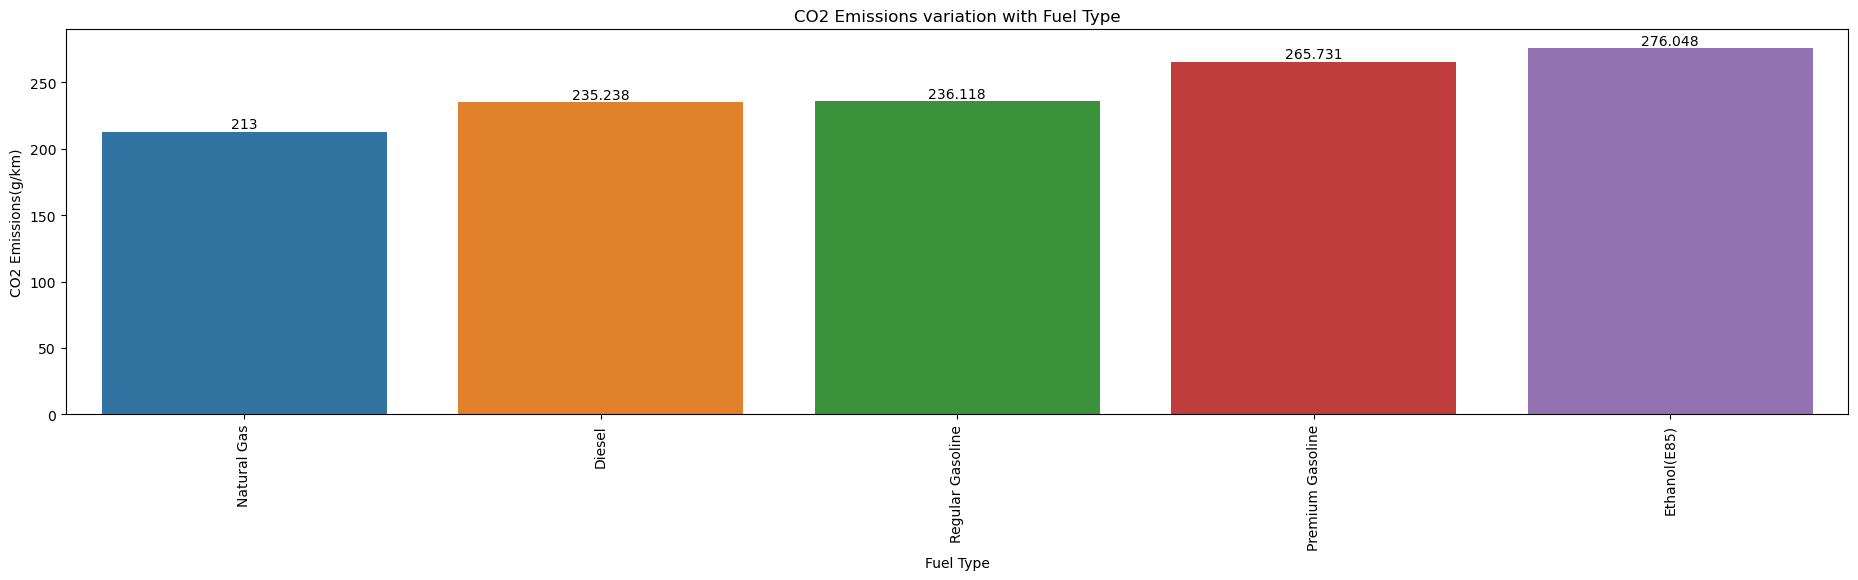

In [50]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=10)
plt.show()

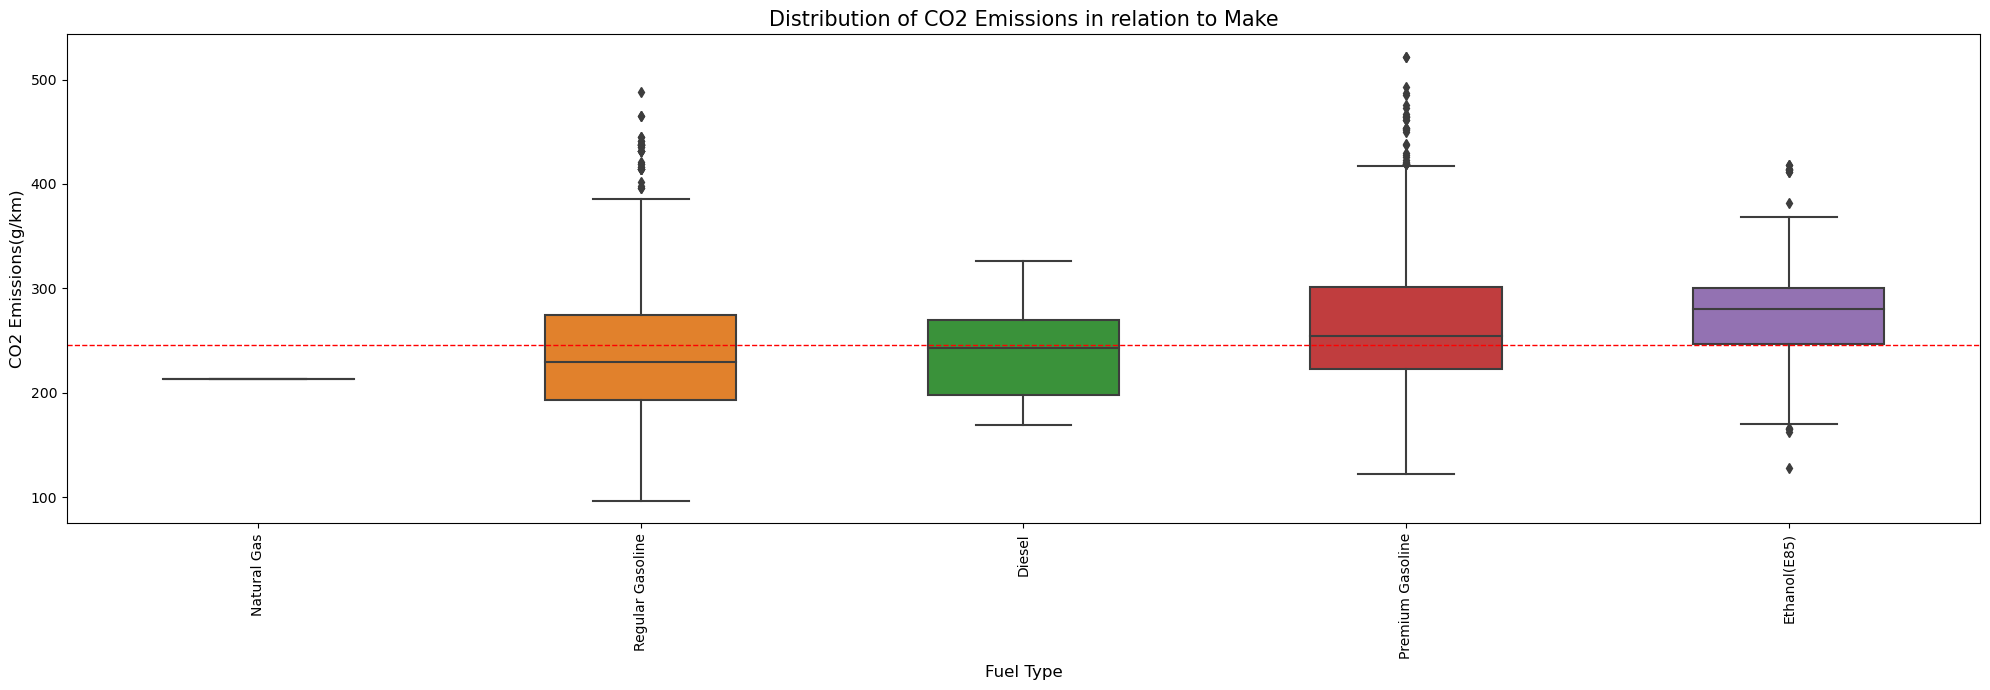

In [51]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color=red>Conclusion Of the EDA </font>
#### 1. There are total 42 types of car brand.
#### 2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
#### 3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categories the similar vehicle into a same group. 
#### 4. The 27 type of transmission has been clubbed into 5 different transmission without taking the number of clutches into account, as they does not affect CO2 emissions.
#### 5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.
#### 6. We have only one data on natural gas. So we cannot predict anything using only one data. That's why we have to drop this row.


## <font color='red'> DATA CLEANING </font>

### <font color=green> Correlation </font>

### We have to remove Natural Gass data from our data set. Because we can predict anything by only use one record.

In [52]:
df_natural=df[df["Fuel Type"]=="Natural Gas"]
natural=df_natural.index
df_natural

Make             Model Vehicle Class  Engine Size(L)  Cylinders  \
2232  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE             3.6          6   

     Transmission    Fuel Type  Fuel Consumption City (L/100 km)  \
2232           AS  Natural Gas                              15.2   

      Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
2232                              9.5                   12.7   

      Fuel Consumption Comb (mpg)  co2_emissions  
2232                           22            213

In [53]:
# We have to remove Natural Gas from our data set
for i in natural:
    df.drop(i, axis = 0,inplace = True)

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
df[df["Fuel Type"]=="Natural Gas"]


Empty DataFrame
Columns: [Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel_Consumption_Comb, Fuel Consumption Comb (mpg), co2_emissions]
Index: []

In [56]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0  ACURA         ILX       COMPACT             2.0          4   
1  ACURA         ILX       COMPACT             2.4          4   
2  ACURA  ILX HYBRID       COMPACT             1.5          4   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6   

            Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
0                     AS  Premium Gasoline                               9.9   
1                      M  Premium Gasoline                              11.2   
2  Continuously Variable  Premium Gasoline                               6.0   
3                     AS  Premium Gasoline                              12.7   
4                     AS  Premium Gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  co2_emissions  
0                           33            196  
1                           29            221  
2                           48            136  
3                           25            255  
4                           27            244

In [57]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Index'})
df_check

Index  Fuel Type
0  Regular Gasoline       3030
1  Premium Gasoline       2765
2      Ethanol(E85)        330
3            Diesel        147

In [58]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0  ACURA         ILX       COMPACT             2.0          4   
1  ACURA         ILX       COMPACT             2.4          4   
2  ACURA  ILX HYBRID       COMPACT             1.5          4   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6   

            Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
0                     AS  Premium Gasoline                               9.9   
1                      M  Premium Gasoline                              11.2   
2  Continuously Variable  Premium Gasoline                               6.0   
3                     AS  Premium Gasoline                              12.7   
4                     AS  Premium Gasoline                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
0                              6.7                    8.5   
1                              7.7                    9.6   
2                              5.8                    5.9   
3                              9.1                   11.1   
4                              8.7                   10.6   

   Fuel Consumption Comb (mpg)  co2_emissions  
0                           33            196  
1                           29            221  
2                           48            136  
3                           25            255  
4                           27            244

In [59]:
df.tail()

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
6267  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
6268  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
6269  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
6270  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
6271  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission         Fuel Type  Fuel Consumption City (L/100 km)  \
6267           AS  Premium Gasoline                              10.7   
6268           AS  Premium Gasoline                              11.2   
6269           AS  Premium Gasoline                              11.7   
6270           AS  Premium Gasoline                              11.2   
6271           AS  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel_Consumption_Comb  \
6267                              7.7                    9.4   
6268                              8.3                    9.9   
6269                              8.6                   10.3   
6270                              8.3                    9.9   
6271                              8.7                   10.7   

      Fuel Consumption Comb (mpg)  co2_emissions  
6267                           30            219  
6268                           29            232  
6269                           27            240  
6270                           29            232  
6271                           26            248

### To check the correlation between our data we have to remove "Mode", "Make","Vehicle Class","Transmission","FuelType"

In [60]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel_Consumption_Comb',
       'Fuel Consumption Comb (mpg)', 'co2_emissions'],
      dtype='object')

In [61]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel_Consumption_Comb'],inplace=True,axis=1)

In [62]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (mpg)','co2_emissions']]
df_correlation.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  co2_emissions
0             2.0          4                           33            196
1             2.4          4                           29            221
2             1.5          4                           48            136
3             3.5          6                           25            255
4             3.5          6                           27            244

In [63]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

index  Fuel Type
0  Regular Gasoline       3030
1  Premium Gasoline       2765
2      Ethanol(E85)        330
3            Diesel        147

In [64]:
df_correlation.corr().T

Engine Size(L)  Cylinders  \
Engine Size(L)                     1.000000   0.928796   
Cylinders                          0.928796   1.000000   
Fuel Consumption Comb (mpg)       -0.764062  -0.724357   
co2_emissions                      0.855067   0.834749   

                             Fuel Consumption Comb (mpg)  co2_emissions  
Engine Size(L)                                 -0.764062       0.855067  
Cylinders                                      -0.724357       0.834749  
Fuel Consumption Comb (mpg)                     1.000000      -0.906986  
co2_emissions                                  -0.906986       1.000000

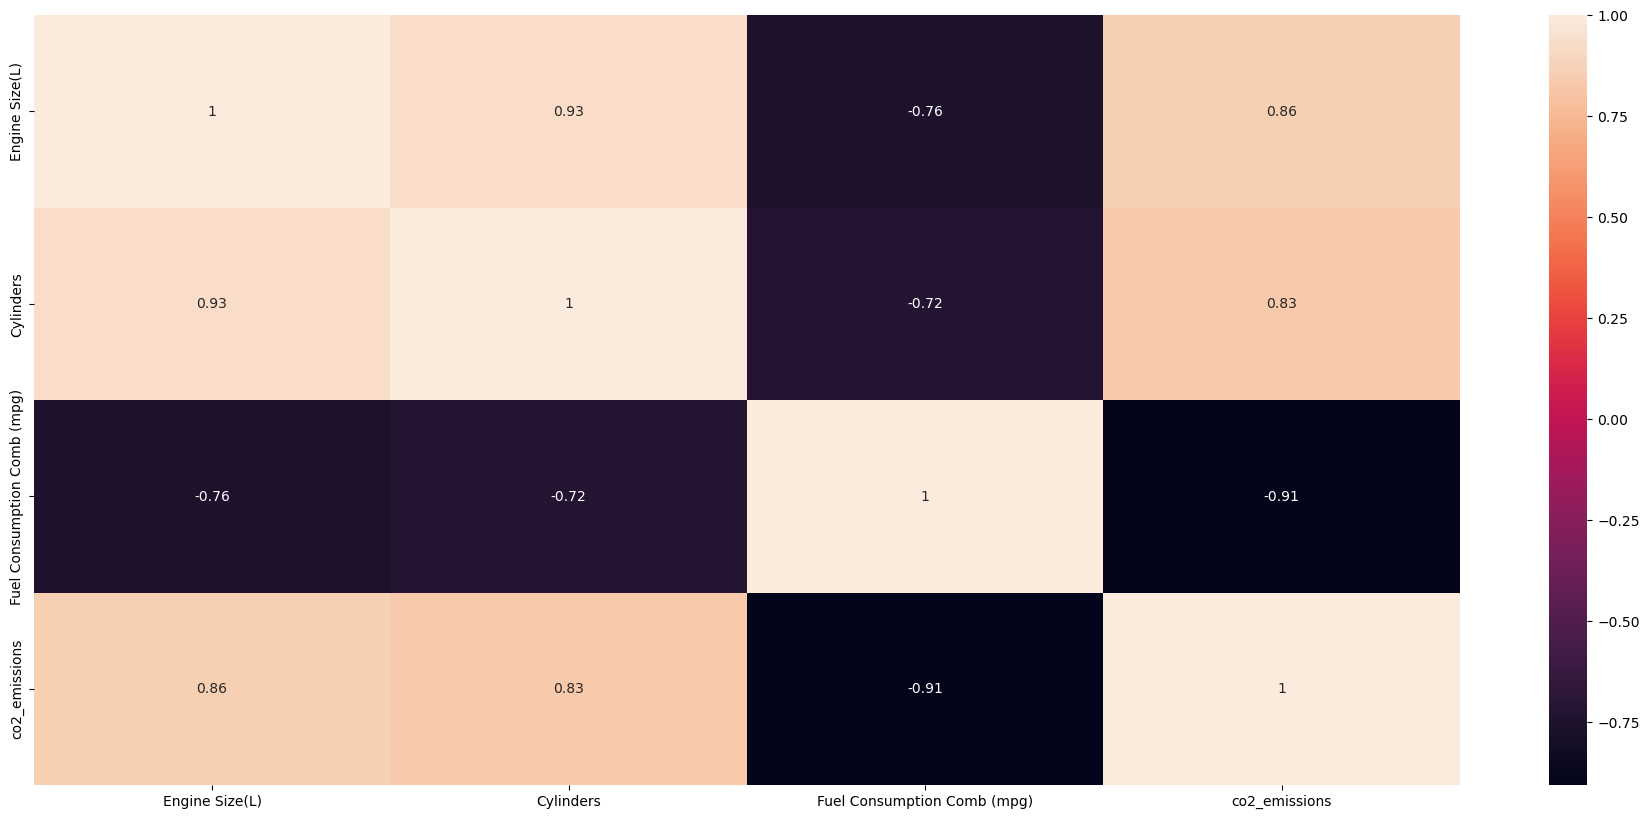

In [65]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

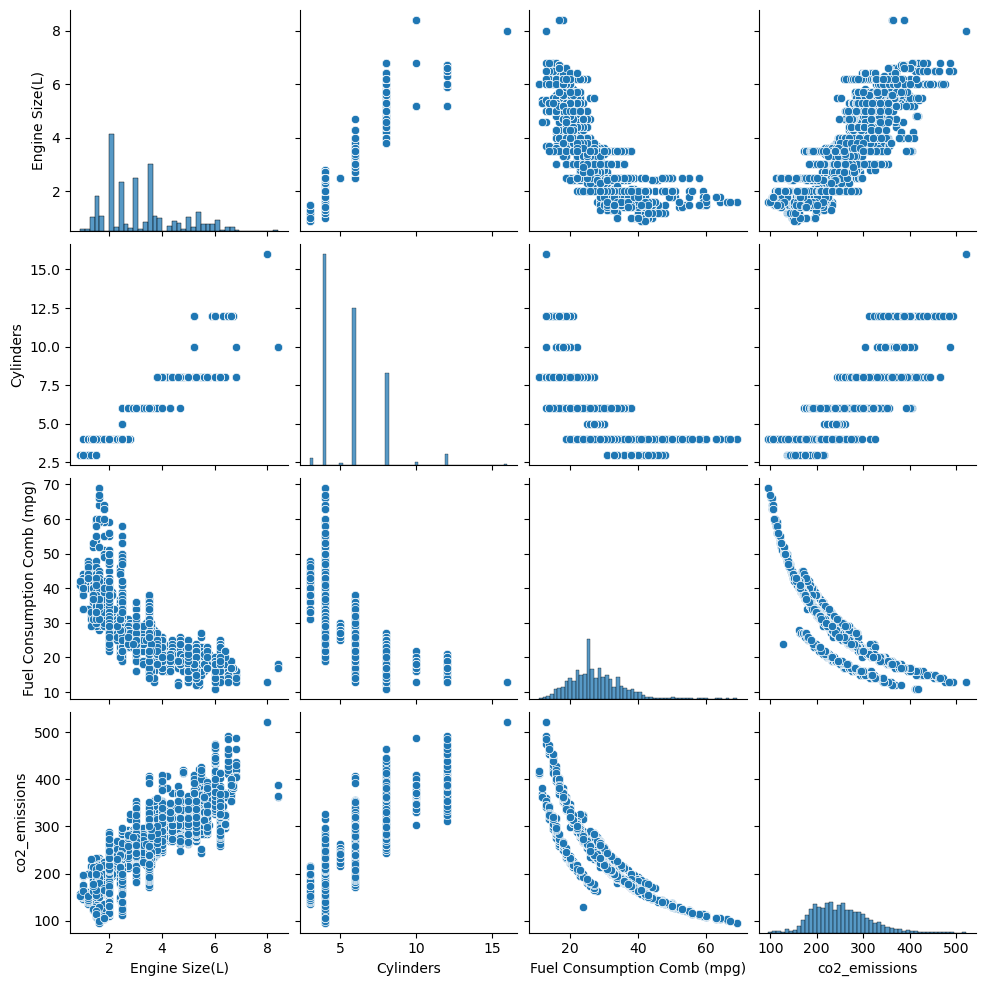

In [66]:
sns.pairplot(df_correlation)

### <font color='green'>Outliers</font>

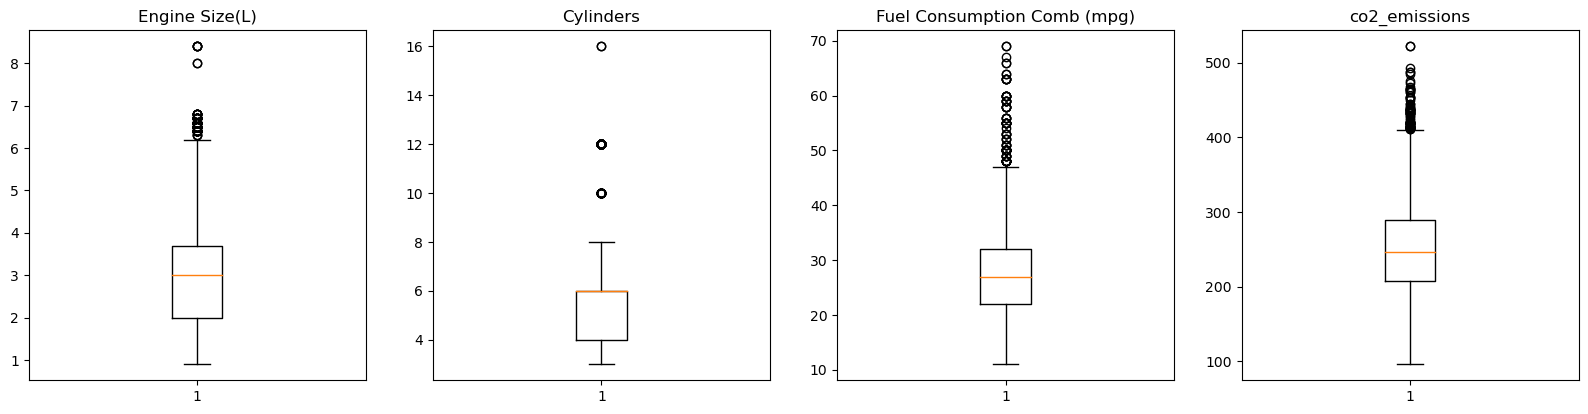

In [67]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [68]:
#removing the outliers
df_new = df_correlation[(np.abs(stats.zscore(df_correlation)) < 1.9).all(axis=1)]

In [69]:
df_new.reset_index(drop=True, inplace=True)

In [70]:
df_new.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  co2_emissions
0             2.0          4                           33            196
1             2.4          4                           29            221
2             3.5          6                           25            255
3             3.5          6                           27            244
4             3.5          6                           28            230

In [71]:
print("The length of the original : " , len(df))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df)-len(df_new),"Outliers")

The length of the original :  6272
The length after removing the outliers :  5572
We just Removed 700 Outliers


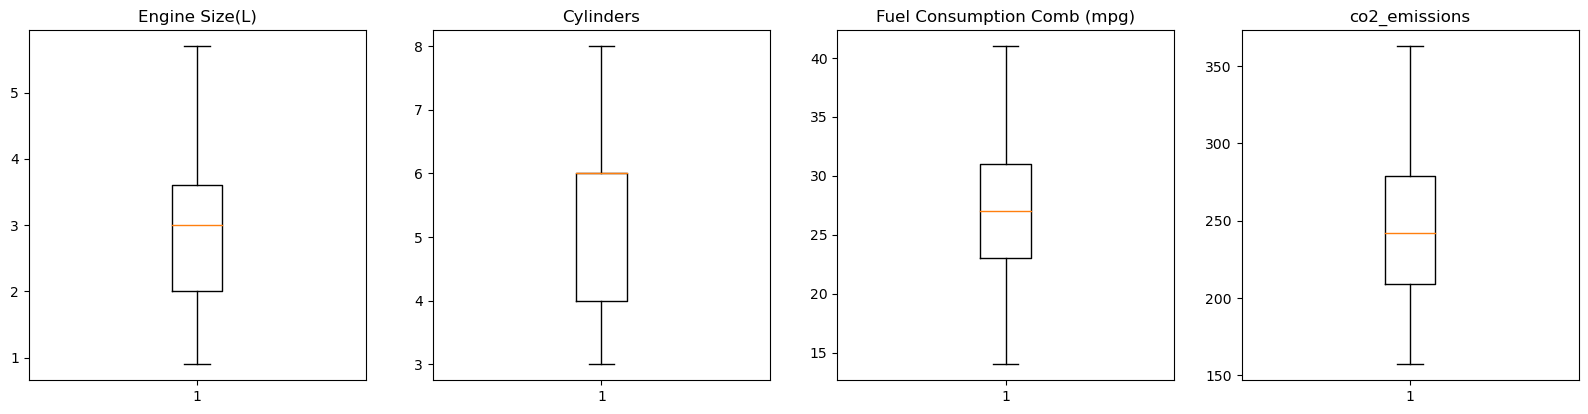

In [72]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

In [73]:
# with outliers
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)               6272.0    3.162930   1.365392   0.9    2.0   
Cylinders                    6272.0    5.620536   1.846565   3.0    4.0   
Fuel Consumption Comb (mpg)  6272.0   27.395886   7.225727  11.0   22.0   
co2_emissions                6272.0  251.253348  59.238150  96.0  208.0   

                               50%    75%    max  
Engine Size(L)                 3.0    3.7    8.4  
Cylinders                      6.0    6.0   16.0  
Fuel Consumption Comb (mpg)   27.0   32.0   69.0  
co2_emissions                246.0  289.0  522.0

In [74]:
# without outliers
df_new.describe().T

count        mean        std    min    25%  \
Engine Size(L)               5572.0    2.961486   1.113067    0.9    2.0   
Cylinders                    5572.0    5.357681   1.473766    3.0    4.0   
Fuel Consumption Comb (mpg)  5572.0   27.501077   5.693181   14.0   23.0   
co2_emissions                5572.0  244.970567  45.955297  157.0  209.0   

                               50%    75%    max  
Engine Size(L)                 3.0    3.6    5.7  
Cylinders                      6.0    6.0    8.0  
Fuel Consumption Comb (mpg)   27.0   31.0   41.0  
co2_emissions                242.0  279.0  363.0

In [75]:
df_new.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  co2_emissions
0             2.0          4                           33            196
1             2.4          4                           29            221
2             3.5          6                           25            255
3             3.5          6                           27            244
4             3.5          6                           28            230

### <font color='green'> Sample Frame </font>

In [76]:
sample_df=df_new.sample(n=200,random_state=35)
sample_df.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  co2_emissions
948              2.0          4                           32            205
1841             4.4          8                           19            344
2603             3.6          6                           16            296
3192             2.0          4                           41            186
4117             2.0          4                           31            210

In [77]:
indexs=sample_df.index
indexs

Int64Index([ 948, 1841, 2603, 3192, 4117, 2898, 2332, 4943, 3025, 2205,
            ...
            4487, 2783, 5013, 2466, 3641,  817, 4024,  211, 4357, 2768],
           dtype='int64', length=200)

In [78]:
# we have to drop the sample dataframes
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

In [79]:
df_new.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  co2_emissions
0             2.0          4                           33            196
1             2.4          4                           29            221
2             3.5          6                           25            255
3             3.5          6                           27            244
4             3.5          6                           28            230

In [80]:
sample_df_Xtest=sample_df.drop(['co2_emissions'],axis=1)
sample_df_ytest=sample_df["co2_emissions"]

In [81]:
new=sample_df_Xtest.astype(np.float32)
sample_df_Xtest = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_Xtest["Engine Size(L)"]=sample_df_Xtest["Engine Size(L)"].map(lambda x:round(x,2))
sample_df_Xtest["Cylinders"]=sample_df_Xtest["Cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["Fuel Consumption Comb (mpg)"]=sample_df_Xtest["Fuel Consumption Comb (mpg)"].map(lambda x:round(x,2))
sample_df_Xtest.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)
948             0.21        0.2                         0.65
1841            0.72        1.0                         0.15
2603            0.55        0.6                         0.04
3192            0.21        0.2                         1.00
4117            0.21        0.2                         0.62

### <font color='green'> Normalize </green>

In [82]:
X = df_new.drop(['co2_emissions'], axis= 1).astype(np.float32)
y = df_new["co2_emissions"].astype(np.float32)

In [83]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X))


In [84]:
X["Engine Size(L)"]=X["Engine Size(L)"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["Fuel Consumption Comb (mpg)"]=X["Fuel Consumption Comb (mpg)"].map(lambda x:round(x,2))

In [85]:
X.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)
0            0.23        0.2                         0.70
1            0.31        0.2                         0.56
2            0.54        0.6                         0.41
3            0.54        0.6                         0.48
4            0.54        0.6                         0.52

In [86]:
y.head()

0    196.0
1    221.0
2    255.0
3    244.0
4    230.0
Name: co2_emissions, dtype: float32

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4297, 3)
y_train (4297,)
X_test (1075, 3)
y_test (1075,)


# <font color='red'>Model Building</font>

In [88]:
# Importing some ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### <font color='Green'>LR (Linear Regression)</font>

In [89]:
def train_linear_regression_model(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    lin_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, lin_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_Linear": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_Linear"] = result_pred["Pred_Linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_Linear"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_linear_regression_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, lin_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {lin_r2_score}")
    linear_regression_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 15.862026834954248
Testing RMSE: 15.448214452924027
R^2 score on Training Data: 0.8799218662494004
Cross-validated R^2 score: 0.8793118232953745
Mean Difference: 10.34165


In [90]:
linear_regression_pred.head(20)

Pred_Linear  Real_Value   Diff
0        210.10         205   5.10
1        319.89         344 -24.11
2        322.60         296  26.60
3        155.40         186 -30.60
4        214.79         210   4.79
5        280.40         285  -4.60
6        321.93         356 -34.07
7        242.56         226  16.56
8        280.08         293 -12.92
9        279.45         295 -15.55
10       256.64         240  16.64
11       197.60         197   0.60
12       197.60         195   2.60
13       303.18         289  14.18
14       242.56         232  10.56
15       262.89         256   6.89
16       246.05         257 -10.95
17       214.79         207   7.79
18       299.87         299   0.87
19       214.79         209   5.79

### <font color='green'>RF (Random Forest)</font>

In [91]:
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, rf_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_random_forest_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, rf_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {rf_r2_score}")
    random_forest_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 7.565537892393457
Testing RMSE: 9.01211827901419
R^2 score on Training Data: 0.9726834284759516
Cross-validated R^2 score: 0.9660830604742012
Mean Difference: 9.939099999999998


In [92]:
random_forest_pred.head(20)

Pred_RF  Real_Value   Diff
0    212.07         205   7.07
1    357.99         344  13.99
2    306.19         296  10.19
3    160.95         186 -25.05
4    212.07         210   2.07
5    299.77         285  14.77
6    354.35         356  -1.65
7    232.95         226   6.95
8    299.77         293   6.77
9    296.56         295   1.56
10   242.97         240   2.97
11   193.37         197  -3.63
12   193.37         195  -1.63
13   310.61         289  21.61
14   232.95         232   0.95
15   259.67         256   3.67
16   248.42         257  -8.58
17   212.07         207   5.07
18   314.31         299  15.31
19   212.07         209   3.07

### <font color='green'>SVR (Systemic Vascular Resistance)</font>

In [93]:
def train_svr_model(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    svr_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, svr_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_SVR": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_SVR"] = result_pred["Pred_SVR"].round(2)
    result_pred["Diff"] = result_pred["Pred_SVR"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_svr_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, svr_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {svr_r2_score}")
    svr_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 13.87034198551587
Testing RMSE: 13.6067789468322
R^2 score on Training Data: 0.9081834633098056
Cross-validated R^2 score: 0.906256953974055
Mean Difference: 8.3479


In [94]:
svr_pred.head(20)

Pred_SVR  Real_Value   Diff
0     208.53         205   3.53
1     323.04         344 -20.96
2     298.33         296   2.33
3     170.98         186 -15.02
4     214.52         210   4.52
5     288.71         285   3.71
6     324.58         356 -31.42
7     231.59         226   5.59
8     288.42         293  -4.58
9     287.59         295  -7.41
10    250.75         240  10.75
11    193.66         197  -3.34
12    193.66         195  -1.34
13    310.75         289  21.75
14    231.59         232  -0.41
15    261.64         256   5.64
16    252.03         257  -4.97
17    214.52         207   7.52
18    302.50         299   3.50
19    214.52         209   5.52

### <font color='green'>KNN (k-nearest neighbors algorithm)</font>

In [95]:
def train_knn_model(X_train, y_train):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    knn_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, knn_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_KNN": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_KNN"] = result_pred["Pred_KNN"].map(lambda x:round(x,2))
    result_pred["Diff"] = result_pred["Pred_KNN"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_knn_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, knn_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {knn_r2_score}")
    knn_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 8.386491775512695
Testing RMSE: 9.88016128540039
R^2 score on Training Data: 0.9664334058681983
Cross-validated R^2 score: 0.9585268797959472
Mean Difference: 8.778999999999998


In [96]:
knn_pred.head(20)

Pred_KNN  Real_Value  Diff
0      202.2         205  -2.8
1      340.6         344  -3.4
2      292.2         296  -3.8
3      171.2         186 -14.8
4      210.8         210   0.8
5      296.4         285  11.4
6      345.8         356 -10.2
7      238.8         226  12.8
8      296.4         293   3.4
9      292.4         295  -2.6
10     242.6         240   2.6
11     193.4         197  -3.6
12     193.4         195  -1.6
13     313.8         289  24.8
14     238.8         232   6.8
15     263.4         256   7.4
16     248.0         257  -9.0
17     210.8         207   3.8
18     311.4         299  12.4
19     210.8         209   1.8

## <font color='red'> Models R2 Score Comparison Table </font>

In [97]:
data = {"Model": ["Linear Regression", "Random Forest","SVR", "KNN"], "R2 Score": [lin_r2_score,rf_r2_score,svr_r2_score,knn_r2_score]}
df=pd.DataFrame(data)
df

Model  R2 Score
0  Linear Regression  0.879312
1      Random Forest  0.966083
2                SVR  0.906257
3                KNN  0.958527

### <font color='green'>As you can see, we are getting more accuracy in our random forest model. So we are going to use the Random Forest model in our deployment.</font>.

# <font color='red'>Difference Table</font>

In [98]:
import plotly.graph_objects as go

In [99]:
results = pd.concat([linear_regression_pred['Real_Value'],linear_regression_pred['Pred_Linear'], knn_pred['Pred_KNN'], svr_pred['Pred_SVR'], random_forest_pred['Pred_RF']], axis=1,sort=False)
# Define the colors for the table
colors = ['lightpink', 'lightgreen', 'yellow', 'lightgreen', 'yellow']
# # Create the table using Plotly
fig = go.Figure(data=[go.Table(header=dict(values=['Values from our Data Set', 'Linear Model Predicated Values','KNN Model Predicated Values','SVR Model Predicated Values','RF Model Predicated Values'], line_color='blacK', fill_color='LightSlateGray', align='center',font=dict(color='white', size=12)),
cells=dict( values=[results['Real_Value'],results['Pred_Linear'], results['Pred_KNN'], results['Pred_SVR'], results['Pred_RF'],], line_color=colors, fill_color=colors, align='center', font=dict(color='#660033', size=13)))])

In [100]:
fig.show()